# The Vanishing Gradient Problem
- The Vanishing Gradient Problem occurs when training deep neural networks, where the gradients (used for updating weights during backpropagation) become very small in the earlier layers. This makes weight updates negligible, causing the network to stop learning properly.

### Why does this happens
##### 1. Activation Function:
   - - Functions like Sigmoid and Tanh squash input values into a small range (e.g., 0 to 1 for Sigmoid, -1 to 1 for Tanh).
     - When backpropagating, the derivative of these functions is very small for extreme values, making gradients almost zero in deep layers.
<br>
##### 2. Backpropagation & Chain Rule:
   - - During backpropagation, gradients are calculated using the chain rule.
     - If each layer's gradient is a small value (e.g., < 1), multiplying many of these together results in an exponentially smaller gradient.
     - This leads to almost no weight updates in early layers, causing them to "freeze."



<hr>

#### Effects of Vanishing Gradient
1. Slow or no learning in early layers.
2. Poor feature extraction from the input data.
3. Lower accuracy & poor generalization.

### Code Example of Vanishing Gradient

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

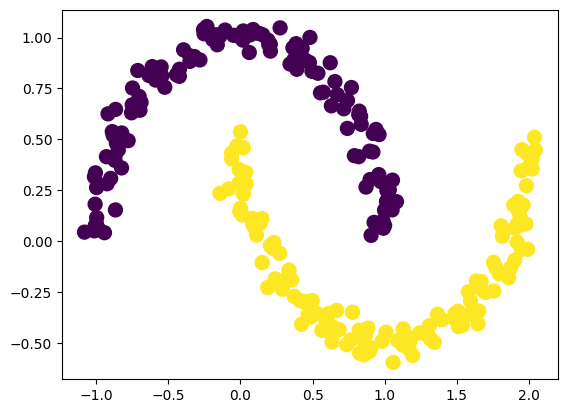

In [3]:
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.show()

In [39]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
old_weight = model.get_weights()[0]

In [42]:
old_weight[0]

array([ 0.01558423,  0.5862196 , -0.21140775,  0.6015237 ,  0.20326394,
       -0.31302193, -0.5937338 ,  0.4431178 ,  0.5198409 , -0.12386268],
      dtype=float32)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5433 - loss: 0.8573
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4895 - loss: 0.9071
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4940 - loss: 0.8764 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5237 - loss: 0.8196
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4971 - loss: 0.8303
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5037 - loss: 0.8049 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4470 - loss: 0.8413 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5323 - loss: 0.7507
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5281 - loss: 0.7449
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4741 - loss: 0.7762
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5140 - loss: 0.7379
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4982 -

In [45]:
new_weight = model.get_weights()[0]

In [46]:
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [47]:
gradient = (old_weight - new_weight) / 0.001
percent_change = abs(100 * (old_weight - new_weight) / old_weight)

In [48]:
gradient

array([[ -81.665825,  -94.77966 ,   75.847176,   29.022097,  118.06379 ,
          68.232056,   95.47376 , -118.346985, -112.98257 ,  101.72121 ],
       [  68.70462 ,   92.83742 ,  -59.973682,  -16.648188,  -98.557526,
         -59.902485,  -91.88601 ,  111.5761  ,  112.166756,  -90.17852 ]],
      dtype=float32)

In [49]:
percent_change

array([[524.0286  ,  16.167946,  35.877197,   4.824764,  58.083984,
         21.797853,  16.08023 ,  26.707794,  21.734068,  82.124176],
       [ 83.76163 , 154.16132 ,  11.058847,   9.699451,  30.098513,
         20.152412,  19.707947,  26.451204,  56.380238, 392.42526 ]],
      dtype=float32)

In [50]:
from matplotlib import pyplot as plt

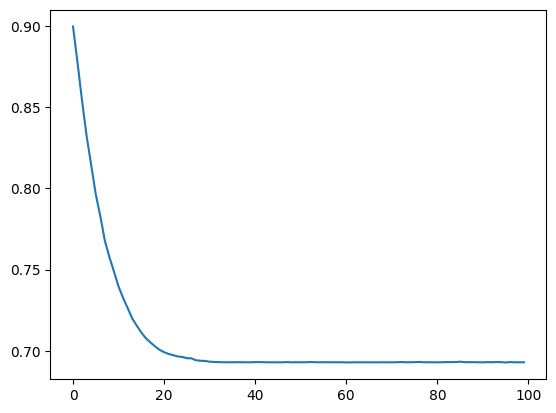

In [51]:
plt.plot(history.history['loss'])

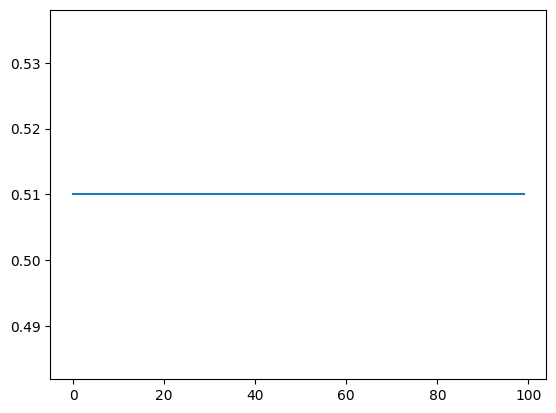

In [52]:
plt.plot(history.history['accuracy'])

### how to solve vanishing Gradient Problem

## 1. Reduce the Number of Hidden layers


## 2. Use Relu as a activation functoin

In [53]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
old_weight = model.get_weights()[0]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7350 - loss: 0.6885
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7973 - loss: 0.6803
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7665 - loss: 0.6734
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7779 - loss: 0.6610
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7798 - loss: 0.6438
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8155 - loss: 0.6136 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8109 - loss: 0.5782
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8133 - loss: 0.5418
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8492 - loss: 0.4741
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8619 - loss: 0.4098
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8127 - loss: 0.3834
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8487 - l

In [58]:
new_weight = model.get_weights()[0]

In [59]:
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [60]:
gradient = (old_weight - new_weight) / 0.001
percent_change = abs(100 * (old_weight - new_weight) / old_weight)

In [61]:
gradient

array([[ -60.183254, -103.48844 ,  -80.36098 , -229.18205 ,  165.30566 ,
         220.34706 ,  -82.770645,  -36.116   ,  -50.933186,  218.59267 ],
       [ -80.387886,    7.936358,  -25.08667 , -103.2958  ,   30.65273 ,
         -76.148224,   87.669785,  171.09816 ,  -89.01098 , -112.58032 ]],
      dtype=float32)

In [62]:
percent_change

array([[ 23.163174 ,  16.320745 ,  17.801552 ,  41.779617 ,  23.893692 ,
         64.62472  ,  14.686068 ,   8.11181  ,  85.92084  , 172.01845  ],
       [ 11.652353 ,   1.9418535,   5.818495 ,  19.905949 ,   9.865095 ,
        106.03606  ,  17.543285 ,  31.002659 ,  35.496735 ,  26.090157 ]],
      dtype=float32)

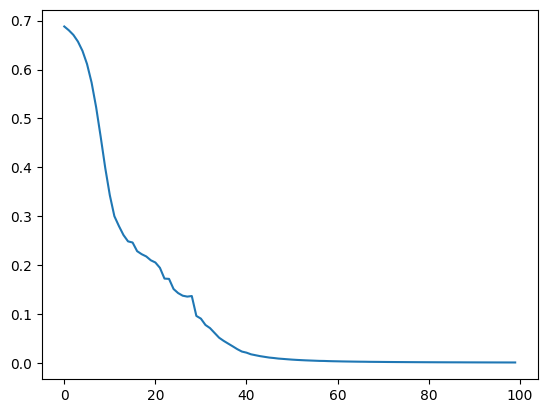

In [63]:
plt.plot(history.history['loss'])

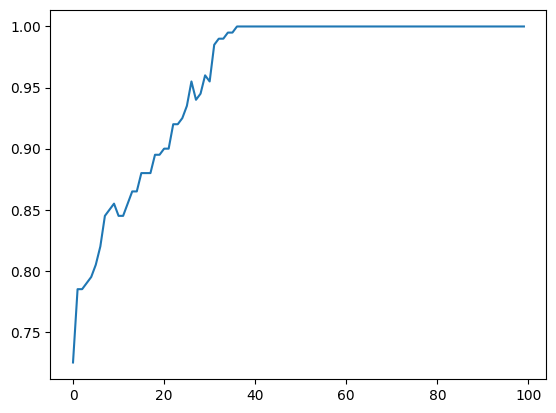

In [64]:
plt.plot(history.history['accuracy'])

In [65]:
# Create a grid of points
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Flatten the grid for model prediction
grid_points = np.c_[xx.ravel(), yy.ravel()]


In [66]:
# Predict class probabilities
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)  # Reshape to match grid shape


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


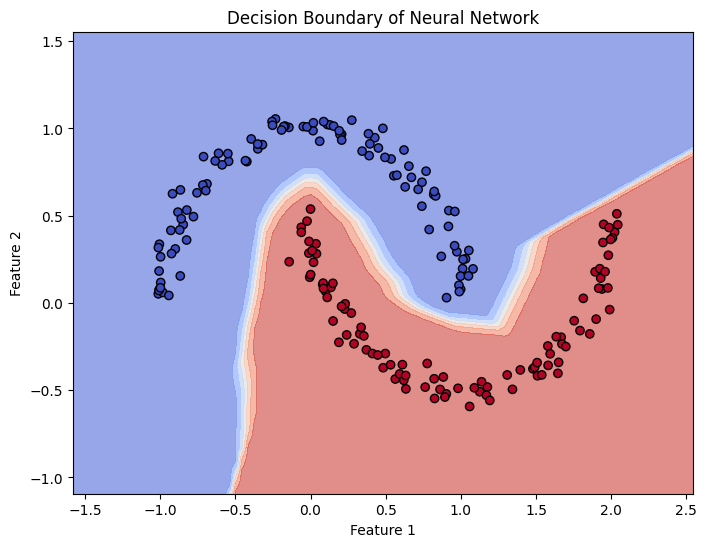

In [69]:
plt.figure(figsize=(8, 6))

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k", cmap=plt.cm.coolwarm)

# Labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of Neural Network")
plt.show()


## 3. Proper Weight Initialization 
    a. Glorot initialization
    b. Xavier initialization

In [ ]:
## 4. Batch Normalization 
    a. Glorot initialization
    b. Xavier initialization

In [ ]:
## Residual Network
    a. building block - ANN
    b. CNN - ResNET
